In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90793b9d722db435696cda25496934fd


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | inhambane
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | porto walter
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | isla mujeres
Processing Record 9 of Set 1 | araouane
Processing Record 10 of Set 1 | chipinge
Processing Record 11 of Set 1 | visnes
Processing Record 12 of Set 1 | mongu
Processing Record 13 of Set 1 | sofiysk
City not found. Skipping...
Processing Record 14 of Set 1 | bukachacha
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | wahiawa
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Se

Processing Record 38 of Set 4 | ilhabela
Processing Record 39 of Set 4 | tabuk
Processing Record 40 of Set 4 | yumen
Processing Record 41 of Set 4 | camopi
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | rawlins
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | tres arroyos
Processing Record 48 of Set 4 | mosetse
Processing Record 49 of Set 4 | ponta do sol
Processing Record 50 of Set 4 | nowy dwor gdanski
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | dakar
Processing Record 3 of Set 5 | klaksvik
Processing Record 4 of Set 5 | bucak
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | beian
Processing Record 7 of Set 5 | port maria
Processing Record 8 of Set 5 | ekpoma
Processing Record 9 of Set 5 | sitio novo do tocantins
Processing Record 10 of Set 5 | sisimiut
Processing Record 11 of Set 5

Processing Record 29 of Set 8 | fukue
Processing Record 30 of Set 8 | mandera
Processing Record 31 of Set 8 | vradiyivka
Processing Record 32 of Set 8 | la gaulette
City not found. Skipping...
Processing Record 33 of Set 8 | henties bay
Processing Record 34 of Set 8 | cherlak
Processing Record 35 of Set 8 | alta floresta
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | kirkland lake
Processing Record 38 of Set 8 | muscat
Processing Record 39 of Set 8 | batticaloa
Processing Record 40 of Set 8 | upington
Processing Record 41 of Set 8 | tecoanapa
Processing Record 42 of Set 8 | nabire
Processing Record 43 of Set 8 | new waterford
Processing Record 44 of Set 8 | guerrero negro
Processing Record 45 of Set 8 | zyryanka
Processing Record 46 of Set 8 | moerai
Processing Record 47 of Set 8 | cabra
Processing Record 48 of Set 8 | mildura
Processing Record 49 of Set 8 | albanel
Processing Record 50 of Set 8 | ketchikan
Processing Record 1 of Set 9 | havre-saint-pierre
P

Processing Record 16 of Set 12 | pandan
Processing Record 17 of Set 12 | sfantu gheorghe
Processing Record 18 of Set 12 | chimore
Processing Record 19 of Set 12 | havoysund
Processing Record 20 of Set 12 | kaeo
Processing Record 21 of Set 12 | kattivakkam
Processing Record 22 of Set 12 | port moresby
Processing Record 23 of Set 12 | moratuwa
Processing Record 24 of Set 12 | beira
Processing Record 25 of Set 12 | svetlaya
Processing Record 26 of Set 12 | weatherford
Processing Record 27 of Set 12 | kurumkan
Processing Record 28 of Set 12 | bria
Processing Record 29 of Set 12 | les cayes
Processing Record 30 of Set 12 | tiruchchendur
Processing Record 31 of Set 12 | cayenne
Processing Record 32 of Set 12 | muisne
Processing Record 33 of Set 12 | moron
Processing Record 34 of Set 12 | dwarka
Processing Record 35 of Set 12 | pochutla
Processing Record 36 of Set 12 | katherine
Processing Record 37 of Set 12 | barra patuca
Processing Record 38 of Set 12 | planeta rica
Processing Record 39 of

In [70]:
len(city_data)

560

In [45]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,58.08,80,7,25.39,AU,2021-08-08 12:50:07
1,Castro,-24.7911,-50.0119,63.75,66,3,5.57,BR,2021-08-08 12:50:33
2,Esperance,-33.8667,121.9000,62.44,79,0,12.19,AU,2021-08-08 12:50:34
3,Inhambane,-23.8650,35.3833,74.50,50,0,9.51,MZ,2021-08-08 12:50:34
4,Nikolskoye,59.7035,30.7861,75.09,65,98,7.99,RU,2021-08-08 12:50:34
5,Porto Walter,-8.2686,-72.7439,78.66,52,0,1.81,BR,2021-08-08 12:50:35
6,Arraial Do Cabo,-22.9661,-42.0278,71.46,73,40,17.27,BR,2021-08-08 12:50:35
7,Isla Mujeres,21.2311,-86.7310,84.00,71,12,9.62,MX,2021-08-08 12:50:04
8,Araouane,18.9048,-3.5265,103.33,17,13,13.65,ML,2021-08-08 12:50:37
9,Chipinge,-20.1883,32.6236,75.70,23,0,8.10,ZW,2021-08-08 12:50:37


In [69]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-08-08 12:50:07,-33.6500,115.3333,58.08,80,7,25.39
1,Castro,BR,2021-08-08 12:50:33,-24.7911,-50.0119,63.75,66,3,5.57
2,Esperance,AU,2021-08-08 12:50:34,-33.8667,121.9000,62.44,79,0,12.19
3,Inhambane,MZ,2021-08-08 12:50:34,-23.8650,35.3833,74.50,50,0,9.51
4,Nikolskoye,RU,2021-08-08 12:50:34,59.7035,30.7861,75.09,65,98,7.99
5,Porto Walter,BR,2021-08-08 12:50:35,-8.2686,-72.7439,78.66,52,0,1.81
6,Arraial Do Cabo,BR,2021-08-08 12:50:35,-22.9661,-42.0278,71.46,73,40,17.27
7,Isla Mujeres,MX,2021-08-08 12:50:04,21.2311,-86.7310,84.00,71,12,9.62
8,Araouane,ML,2021-08-08 12:50:37,18.9048,-3.5265,103.33,17,13,13.65
9,Chipinge,ZW,2021-08-08 12:50:37,-20.1883,32.6236,75.70,23,0,8.10


In [71]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [72]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

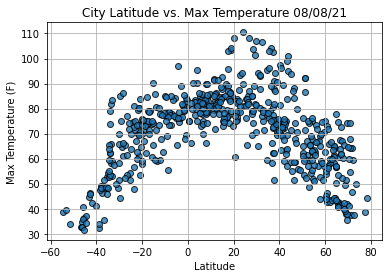

In [73]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

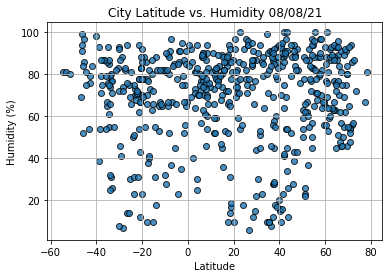

In [74]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

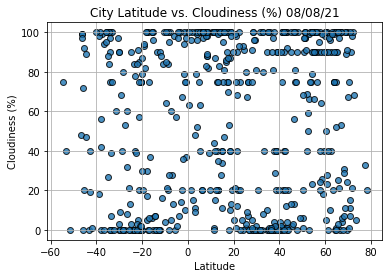

In [75]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

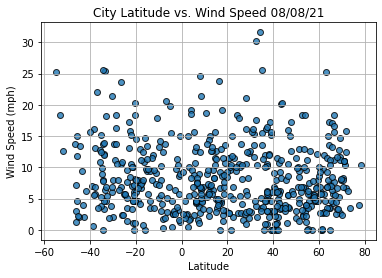

In [76]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [77]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
index13 = city_data_df.loc[13]
index13

City                    Saskylakh
Country                        RU
Date          2021-08-08 12:50:38
Lat                       71.9167
Lng                      114.0833
Max Temp                    64.44
Humidity                       56
Cloudiness                     98
Wind Speed                  12.44
Name: 13, dtype: object

In [81]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Nikolskoye,RU,2021-08-08 12:50:34,59.7035,30.7861,75.09,65,98,7.99
7,Isla Mujeres,MX,2021-08-08 12:50:04,21.2311,-86.7310,84.00,71,12,9.62
8,Araouane,ML,2021-08-08 12:50:37,18.9048,-3.5265,103.33,17,13,13.65
10,Visnes,NO,2021-08-08 12:50:37,59.3556,5.2242,70.57,56,40,6.91
12,Bukachacha,RU,2021-08-08 12:50:38,52.9833,116.9167,59.36,92,66,2.35


In [82]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

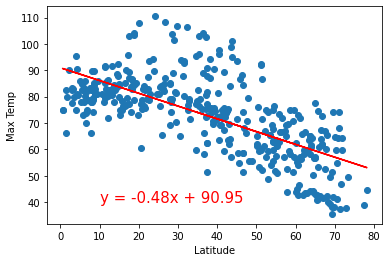

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

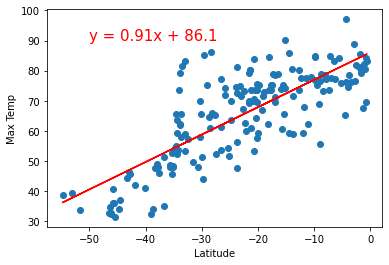

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

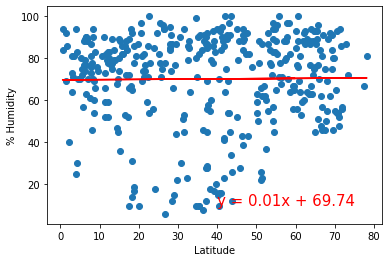

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

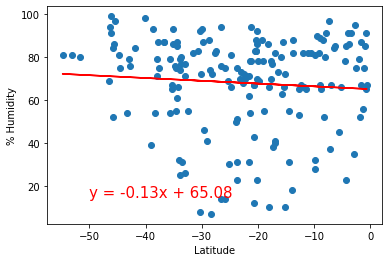

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

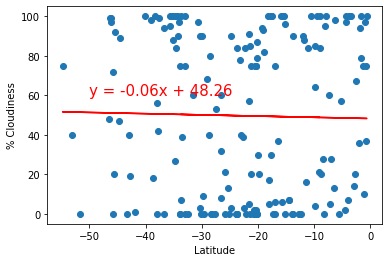

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

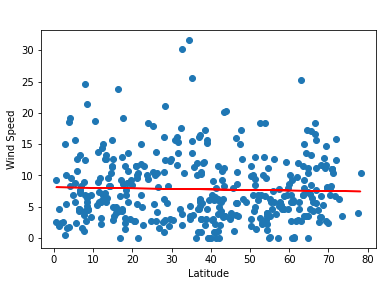

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

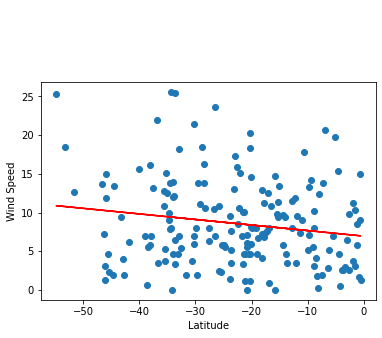

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))